# **TIOBE INDEX RATING ANALYSIS - FEBRUARY 2026 (ISSUE: 3)**

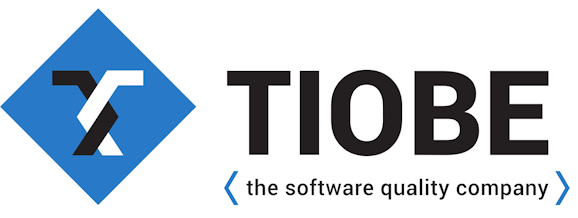

## **SOURCE:** www.tiobe.com

## **Created by** Doğan Yiğit Yenigün (toUpperCase78)

_The TIOBE Programming Community index is an indicator of the popularity of programming languages. The index is updated once a month. The ratings are based on the number of skilled engineers world-wide, courses and third-party vendors. Popular seach engines such as Google, Bing, Yahoo!, Wikipedia, Amazon, YouTube and Baidu are used to calculate the ratings. It is important to note that the TIOBE index is not about the best programming language or the language in which most line of codes have been written._

_The index can be used to check whether your programming skills are still up to date or make a strategic decision about what programming language should be adopted when starting a new software system._

This text above is the explanation from the website for how the index ratings should be evaluated for the current states of programming languages.

Thanks to carefully crafted dataset that holds all the ratings starting from _June 2001,_ up to the present day; my intention is to clearly observe the past achievements and the current popularity of the programming languages we the software developers are using and to predict what lies ahead in the future.

### **OK, let's start by initializing the required modules and the data frame:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
tiobe = pd.read_csv('Tiobe_Index_All_Ratings_February2026.csv')

In [2]:
# Set the date column with the appropriate parsing
tiobe['DATE'] = tiobe['DATE'].apply(lambda x: datetime.strptime(x, "%b %d, %Y"))
tiobe.set_index('DATE', inplace=True)

## The Programming Languages and the Number of Different Days

First of all, let's ask this question: _Which **programming languages** are being tracked in the corresponding dataset? And, how many different days have been observed to obtain the ratings?_

In [3]:
print("These are the programing languages being tracked:")
print(tiobe.columns.values)
print("\nRatings from {} programming languages are available in the dataset.\n".format(len(tiobe.columns)))
print("Individual ratings from up to {} different dates are presented.".format(tiobe.shape[0]))

These are the programing languages being tracked:
['C' 'Java' 'Python' 'C++' 'C#' 'Visual Basic' 'JavaScript' 'PHP' 'R'
 'SQL' 'Go' 'Swift' 'Perl' 'Assembly Language' 'Ruby' 'MATLAB' 'Groovy'
 'Rust' 'Objective-C' 'Dart' 'Classic Visual Basic' 'PL/SQL'
 'Delphi/Object Pascal' 'Transact-SQL' 'Fortran' 'Prolog' 'Lua' 'Scratch'
 'COBOL' 'Julia' 'Kotlin' 'Ada']

Ratings from 32 programming languages are available in the dataset.

Individual ratings from up to 293 different dates are presented.


Let's also print the **first** and **last** days of the evaluations of these index ratings:

Plus, calculate how many **days** have passed between those two dates:

In [4]:
print("FIRST DATE: {}".format(tiobe.index[0]))
print("LAST DATE:  {}".format(tiobe.index[-1]))
diff = tiobe.index[-1] - tiobe.index[0]
print("Total of {} days ({:.2f} years) have passed.".format(diff.days, diff.days/365))

FIRST DATE: 2001-06-30 00:00:00
LAST DATE:  2026-02-01 00:00:00
Total of 8982 days (24.61 years) have passed.


## Visualizations of Ratings of the Programming Languages with No Missing Values

The first thing in this analysis is to _visualize the ratings_ of the available programming languages. These should give us a clear idea for how the ratings of each have been progressed, changed or fluctuated throughout the years and compare which ones had the most popularities at different times.

Let's make sure which languages have been measured since the beginning of TIOBE Index, i.e. **no missing values** have been presented in the corresponding columns:

In [5]:
check_missing = tiobe.isnull().any()
langs_all_ratings_exist = list(check_missing[check_missing == False].index)
print("Total of {} languages possess all rating values in the dataset.".format(len(langs_all_ratings_exist)))
print(langs_all_ratings_exist)

Total of 13 languages possess all rating values in the dataset.
['C', 'Java', 'Python', 'C++', 'C#', 'JavaScript', 'PHP', 'Perl', 'Delphi/Object Pascal', 'Fortran', 'Prolog', 'COBOL', 'Ada']


Let's generate the first visualization by selecting the **first 5 programming languages** in the list above; in a figure containing their ratings as a line chart, enabling us to compare each other:

**NOTE:** Whenever you check the below and the latter figures against the ones in the original TIOBE Index's web site, these **must** be roughly the same.

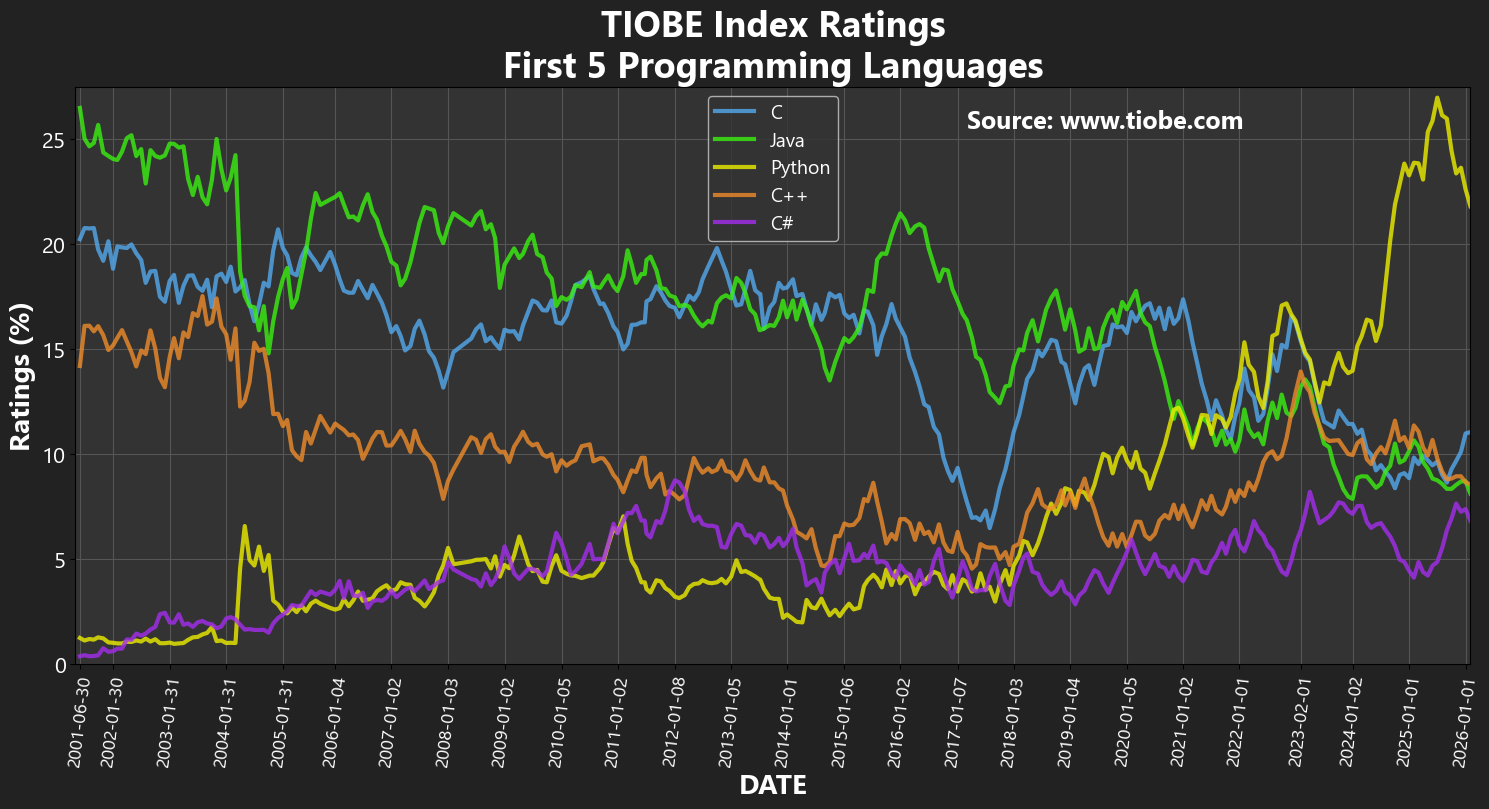

In [6]:
plt.rcParams["font.sans-serif"] = "Segoe UI"
plt.rcParams['figure.facecolor'] = '#222222'
plt.rcParams['axes.facecolor'] = '#333333'
def get_years_ind(index):
    ls = []
    for v in index:
        if v.year == 2023 and v.month == 2:   ls.append(v)
        if v.month == 1:  ls.append(v)
    return ls
tiobe_years_ind = get_years_ind(tiobe.index)
tiobe_years_ind.insert(0, tiobe.index[0])
# tiobe_years_ind.append(tiobe.index[-1])
plt.figure(figsize=(18,7.5))
plt.axis([pd.Timestamp('2001-06-01'), pd.Timestamp('2026-02-01'), 0.0, 27.5])
plt.plot(tiobe.index, tiobe['C'], label='C', color='#54aaf0', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Java'], label='Java', color='#3bf011', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Python'], label='Python', color='#eeee00', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['C++'], label='C++', color='#f08c29', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['C#'], label='C#', color='#a42df0', linewidth=3, alpha=0.8)
plt.title('TIOBE Index Ratings\nFirst 5 Programming Languages', fontsize=26, color='white', fontweight='bold')
plt.text(pd.Timestamp('2017-03-06'), 25.5, 'Source: www.tiobe.com', fontsize=18, color='white', fontweight="bold")
plt.xlabel('DATE', fontsize=20, color='white', fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, color='white', fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=83, fontsize=13, color='white')
plt.yticks(fontsize=16, color='white')
plt.grid(color='#565656')
plt.legend(fontsize=14, labelcolor='white')
plt.show()

This figure frankly shows that **Java** became _the most popular_ one **in many different intervals of the times**! In 2000s, it usually had the rating **higher than 20%**; but in the big picture, its rating trend is getting downward in general and in the last year, the rating was decreased below **10%**!.

**C** language seems to be the _2nd best_ overall. In an approximate 12-month period somewhere between **2004** and **2005**, it surpassed **Java**. This also continued mostly between the **1st quarter of 2012 and the 1st quarter of 2015**. Additionally, it became the most popular again in the years around **2020** and **2021** and this quite-old programming language did not seem to lost popularity as of today, with the latest rating **higher than %10**!

**C++** followed the similar trend like **Java**. Although it started at **around 15%** in the early 2000s, its popularity was decreased gradually in recent years, down to **5%** in some months in the years of **2014** and **2017**; however, this language has gained the popularity again in 2023, being close to **14%** and then, going through 2026, it dropped again **below %10**!.

**Python** should not go unnoticed, as the language's rating was significantly risen up **in the last 5 years**, exceeding **10%**, plus it reached to **the top** for the first time in 2022; but much higher peak was achieved in the middle of 2025, with the overwhelming rating of **26%**! Right then, its rating was decreased a bit and still continue to preserve the rating **above 20%**!

**C#** did not change much at all since 2010 (and if we ignore all the fluctuations happened throughout the years). It reached as high as **approximately 9%** around 2012, but continues within the range of **4-7%** in the recent years.

**After these implications, why not creating the summary statistics of these languages?**

In [7]:
first_five = ['C', 'C++', 'C#', 'Java', 'Python']
round(tiobe[first_five].describe(), 2)

,C,C++,C#,Java,Python
count,293.00,293.00,293.00,293.00,293.00
mean,15.35,9.60,4.50,16.94,6.85
std,3.29,2.94,1.78,4.49,6.01
min,6.48,4.55,0.38,7.87,0.97
25%,13.34,7.47,3.46,14.14,3.11
50%,16.21,9.37,4.44,17.31,4.26
75%,17.69,10.77,5.73,20.03,9.35
max,20.77,17.53,8.76,26.49,26.98


Yep, this covers lots of information without any doubt! But, in simpler way, it is convenient to take **the lowest** and **the highest** ratings and **the specific dates** for when these were measured in a well-constructred text format.

_For the same ratings that might have been measured in different dates, the first occurrence is considered, though..._

In [8]:
print("         LOWEST RATING (DATE) | HIGHEST RATING (DATE)")
for lang in first_five:
    lang_min = tiobe[tiobe[lang] == min(tiobe[lang])][lang]
    lang_max = tiobe[tiobe[lang] == max(tiobe[lang])][lang]
    # print(lang_min, lang_max)
    print("{:>6} | {:5}% ({})  |  {:5}% ({})" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

         LOWEST RATING (DATE) | HIGHEST RATING (DATE)
     C |  6.48% (2017-08-02)  |  20.77% (2001-07-30)
   C++ |  4.55% (2017-04-09)  |  17.53% (2003-08-31)
    C# |  0.38% (2001-06-30)  |   8.76% (2012-01-08)
  Java |  7.87% (2024-01-02)  |  26.49% (2001-06-30)
Python |  0.97% (2003-02-28)  |  26.98% (2025-07-02)


Next, I'd like to continue with the web programming languages, **JavaScript** and **PHP**. Again, the highest and the lowest ratings with dates were included below the figure.

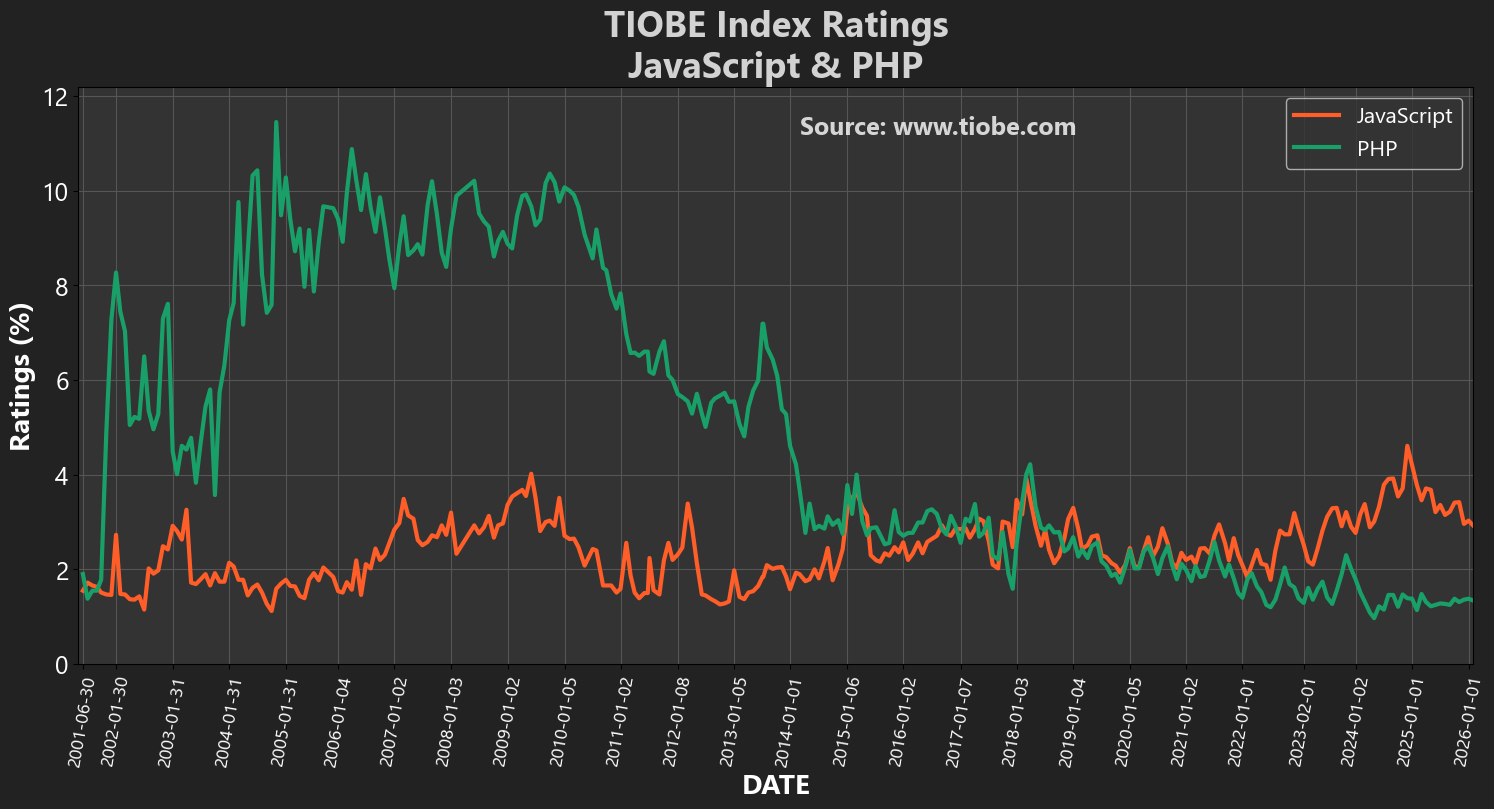

             LOWEST RATING (DATE) | HIGHEST RATING (DATE)
JavaScript |  1.12% (2004-10-31)  |  4.61% (2024-12-01)
       PHP |  0.97% (2024-05-01)  | 11.45% (2004-11-30)


In [9]:
plt.figure(figsize=(18,7.5))
plt.axis([pd.Timestamp('2001-06-01'), pd.Timestamp('2026-02-01'), 0.0, 12.2])
plt.plot(tiobe.index, tiobe['JavaScript'], label='JavaScript', color='#ff5e29', linewidth=3)
plt.plot(tiobe.index, tiobe['PHP'], label='PHP', color='#19a069', linewidth=3)
plt.title('TIOBE Index Ratings\nJavaScript & PHP', fontsize=26, color='white', fontweight='bold', alpha=0.8)
plt.text(pd.Timestamp('2014-03-06'), 11.2, 'Source: www.tiobe.com', fontsize=18, color='white', fontweight='bold', alpha=0.8)
plt.xlabel('DATE', fontsize=20, fontweight='bold', color='white')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold', color='white')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=13, color='white')
plt.yticks(fontsize=18, color='white')
plt.grid(color='#565656')
plt.legend(fontsize=16, labelcolor='white')
plt.show()

print("             LOWEST RATING (DATE) | HIGHEST RATING (DATE)")
for lang in ['JavaScript', 'PHP']:
    lang_min = tiobe[tiobe[lang] == min(tiobe[lang])][lang]
    lang_max = tiobe[tiobe[lang] == max(tiobe[lang])][lang]
    print("{:>10} | {:5}% ({})  | {:5}% ({})" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

This clearly shows **PHP** by far was one of the most popular programming languages, especially in 2000s! It sometimes achieved ratings of **above 10%**. However, it maintained itself within **2-4%** between **2014** and **2021**. Later that, it further dropped down under **2%** and it is expected to preserve this ratings as there are other programming languages and/or frameworks today, suitable for backend programming. However, this still proves that PHP is such a programming language that never dies, even in 2020s!

For **JavaScript**, there were not significant changes in all measurements of days. It went as high as **4%** (even got above this rating near the end of 2024), but it roughly remained stationary within **2-3.9%** in recent years, but this language is still being used for frontend programming, also supported with frameworks such as **React**.

_Furthermore, don't ask why **TypeScript** was not featured here, because this language which is so similar to JavaScript with regards to syntax, never achieved to be in the top 20 of TIOBE Index ratings._

The next figure involves six other programming languages: **Perl**, **Delphi/Object Pascal**, **Fortran**, **Prolog**, **COBOL**, **Ada**.

What they have in common is that these are the remaining ones having **no missing values** in the dataset:

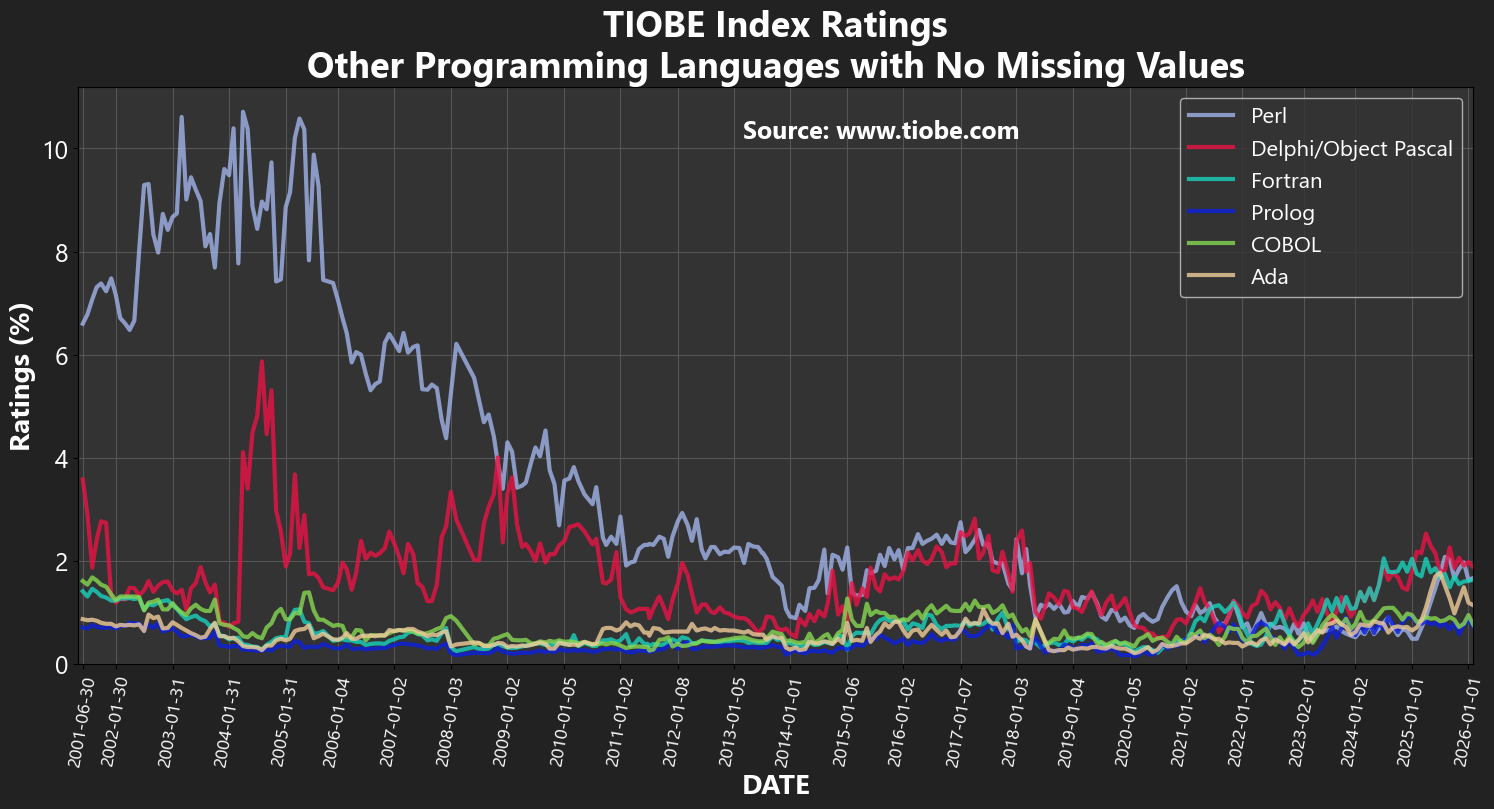

                      LOWEST RATING (DATE) | HIGHEST RATING (DATE)
                Perl |  0.44% (2023-04-01) | 10.71% (2004-04-30)
Delphi/Object Pascal |  0.49% (2020-07-04) |  5.87% (2004-08-30)
             Fortran |  0.22% (2020-07-04) |  2.05% (2024-07-03)
              Prolog |  0.14% (2020-02-04) |  0.92% (2024-08-01)
               COBOL |  0.26% (2011-07-08) |  1.68% (2001-08-30)
                 Ada |  0.21% (2020-02-04) |  1.77% (2025-07-02)


In [10]:
plt.figure(figsize=(18,7.5))
plt.axis([pd.Timestamp('2001-06-01'), pd.Timestamp('2026-02-01'), 0.0, 11.2])
plt.plot(tiobe.index, tiobe['Perl'], label='Perl', color='#a2b4eb', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Delphi/Object Pascal'], label='Delphi/Object Pascal', color='#eb1345', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Fortran'], label='Fortran', color='#19d4be', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Prolog'], label='Prolog', color='#0b20df', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['COBOL'], label='COBOL', color='#88d952', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Ada'], label='Ada', color='#f0cc9b', linewidth=3, alpha=0.8)
plt.text(pd.Timestamp('2013-03-06'), 10.2, 'Source: www.tiobe.com', fontsize=18, color='white', fontweight='bold')
plt.title('TIOBE Index Ratings\nOther Programming Languages with No Missing Values', fontsize=26, color='white', fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold', color='white')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold', color='white')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=13, color='white')
plt.yticks(fontsize=18, color='white')
plt.grid(color='#565656')
plt.legend(fontsize=16, labelcolor='white')
plt.show()

print("                      LOWEST RATING (DATE) | HIGHEST RATING (DATE)")
for lang in ['Perl', 'Delphi/Object Pascal', 'Fortran', 'Prolog', 'COBOL', 'Ada']:
    lang_min = tiobe[tiobe[lang] == min(tiobe[lang])][lang]
    lang_max = tiobe[tiobe[lang] == max(tiobe[lang])][lang]
    print("{:>20} | {:5}% ({}) | {:5}% ({})" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

According to the plot chart above, **Perl** has achieved to become one of the most preferred programming language in 2000s, sometimes getting its rating **above 10%** until the end of 2005. Then, it substantially lost the popularity afterwards, and it continues to have the ratings **below 2%**, or even **below 1%** in recent years! But, the language is regaining the popularity slowly in the last 12 months and can enlist itself in top 20!

About **Delphi/Object Pascal**, it arose up to **about 6%** in 2004; the second peak occurred with **4%** near the end of 2008. For the last few years, it had the ratings in the similar trend like **Perl** and as seen above with this rating in the last measurements, it's able to challenge the others for top 10 positions.

**Fortran** is a programming language with several decades of history and it's not surprising to see it getting higher in the last few years, as new versions are still being developed and published. We believe it can remain at around **2%** rating.

It is revealed that **Prolog** does not seem to be a popular choice throughout the years, although having all rating values existed in the dataset and there is a high chance that the language continue to stay below **1%** rating in the future.

Another language with no missing values and long-lasting history is **COBOL**. However, it did not have the expected popularity when compared to other languages here. Similar to Prolog, it will sustain its rating around **1%** and remain almost fixed unless something unusual happened.

About **Ada**, which is the latest entry of this TIOBE Index Rating, it has gained rating especially in 2025 and forced itself to reach **2%**, but later went with ups and downs in the next months. Still, it could be a good contender to beat other languages.

## Visualizations of the Programming Languages with No Preliminary Data Available

The next parts involve more programming languages, but with **leading missing values** in the dataset. That means there exist NULL rating values for these languages, thus they were not measured in the first few years by TIOBE Index, perhaps because of being first introduced in mid or late 2000s. Despite this situation, it does not affect the chart creation at all...

**Let's see what we came across below:**

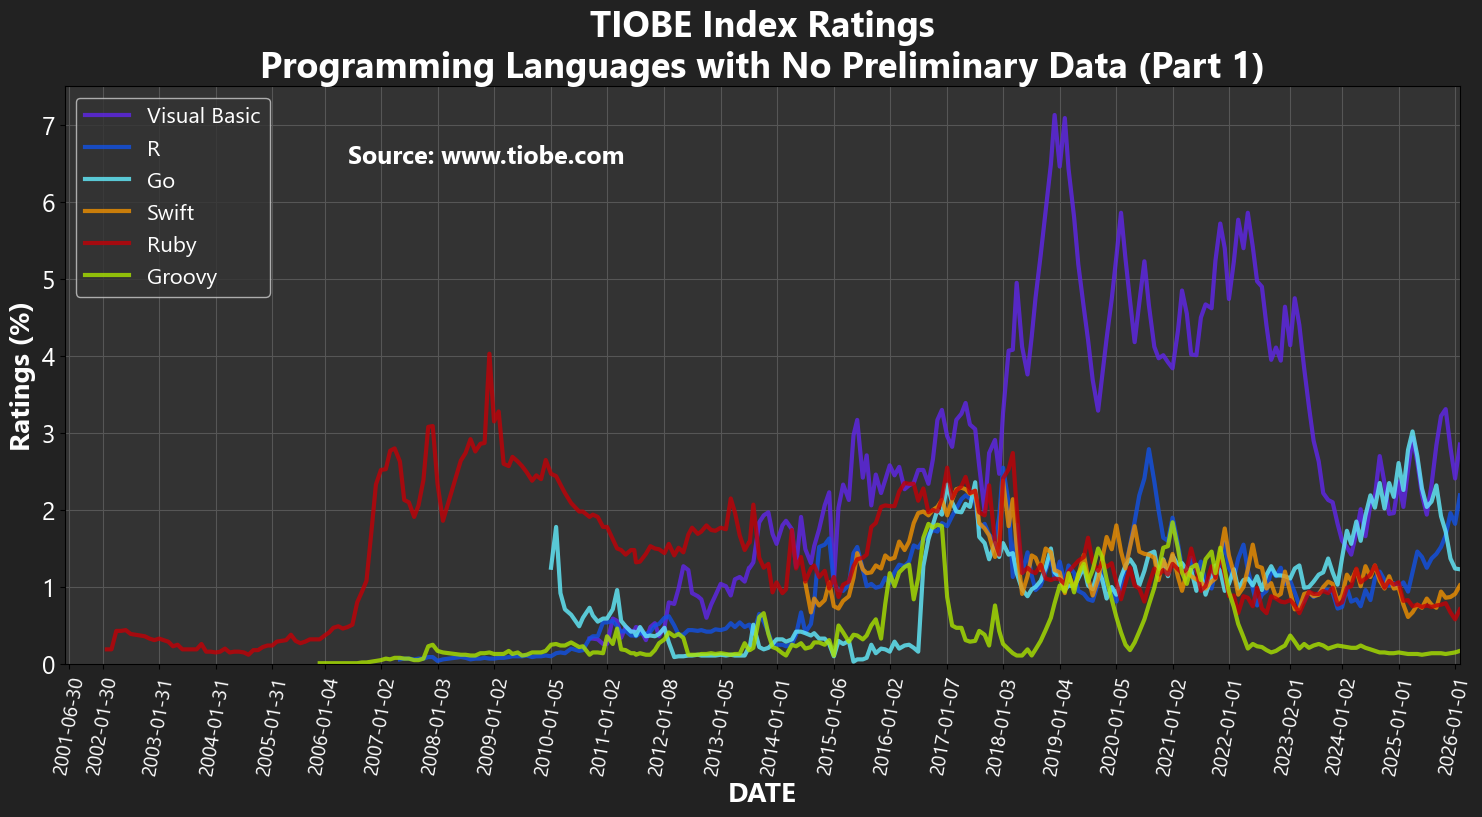

              LOWEST RATING (DATE) | HIGHEST RATING (DATE)
Visual Basic |  0.26% (2010-12-07) |  7.13% (2018-12-02)
           R |  0.04% (2008-01-03) |  2.79% (2020-08-02)
          Go |  0.03% (2015-05-13) |  3.02% (2025-04-01)
       Swift |  0.61% (2025-03-03) |  2.38% (2018-01-03)
        Ruby |  0.12% (2004-08-30) |  4.03% (2008-12-03)
      Groovy |  0.01% (2005-12-03) |  1.84% (2021-01-02)


In [11]:
plt.figure(figsize=(18,7.5))
plt.axis([pd.Timestamp('2001-06-01'), pd.Timestamp('2026-02-01'), 0.0, 7.5])
plt.plot(tiobe.index, tiobe['Visual Basic'], label='Visual Basic', color='#6026eb', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['R'], label='R', color='#1252e6', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Go'], label='Go', color='#63eeff', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Swift'], label='Swift', color='#f09000', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Ruby'], label='Ruby', color='#c20006', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Groovy'], label='Groovy', color='#aae300', linewidth=3, alpha=0.8)
plt.text(pd.Timestamp('2006-06-06'), 6.5, 'Source: www.tiobe.com', fontsize=18, color='white', fontweight='bold')
plt.title('TIOBE Index Ratings\nProgramming Languages with No Preliminary Data (Part 1)', fontsize=26, color='white', fontweight='bold')
plt.xlabel('DATE', fontsize=20, color='white', fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, color='white', fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=14, color='white')
plt.yticks(fontsize=18, color='white')
plt.grid(color='#565656')
plt.legend(fontsize=16, labelcolor='white')
plt.show()

print("              LOWEST RATING (DATE) | HIGHEST RATING (DATE)")
for lang in ['Visual Basic', 'R', 'Go', 'Swift', 'Ruby', 'Groovy']:
    lang_rt = tiobe[~tiobe[lang].isnull()][lang]
    lang_min = lang_rt[lang_rt == min(lang_rt)]
    lang_max = lang_rt[lang_rt == max(lang_rt)]
    print("{:>12} | {:5}% ({}) | {:5}% ({})" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

**Among these six languages above:**

- **Visual Basic** (started in 2010) gained popularity remarkably every year until 2018, reaching a little higher than **7%**. Then, there are rises and falls in the last four years, always staying at above **4%**, but after that, it went down below **2%** in one year period, then gathered some ratings back to around **3%**.
- **Ruby** had the most ratings data in the chart above, started at the beginning of 2002. It saw its peak in late 2008 with a little more than **4%**, then its rating changed continuously between **0.9%** and **2.8%** afterwards. In the year 2025, the rating fluctuated **below 1%**, possibly putting it out of top 20.
- When **R** language appeared in 2007, it wasn't so popular among the software developers. But, it slowly gained its popularity, thus staying above **1%** most of the time in the last decade. Also, it saw its own peak in year 2020, with approximately **2.8%**. 
- **Go** (started in 2010) made a good entrance to the world of programming languages, with above **1%** rating; but then had its rating decreased gradually. In 2017, it saw its sharp increase and reached the peak with **2.3%**. Until 2024, this language's rating values wandered between **1%** and **1.5%**. By inspecting the last two years, its popularity has risen again up to **3%**, beating its previous peak, but dropped down fast in the last months, maintaing higher than **1%** rating.
- Apple's programming language **Swift** first appeared in 2014 (which aimed to replace Objective-C) and has seen the highest rating of nearly **2.4%** in 2018. In the last decade, it stayed within **0.7%** to **1.8%**, and it's a bit unclear whether it can gain higher ratings.
- **Groovy** (started in 2006) did not gain popularity in the first few years. But, things have changed for the language when it received the highest rating with **1.8%** in 2016. Interestingly, it went down to **%0.2** in 2020, then risen up at a very high rate, to approximately **1.9%**. However, its popularity got sharply decreased again in 2022, down to **0.25%** and never recovered back.

**Now, let's move to the _2nd part_ of programming languages with no preliminary data existed in the index:**

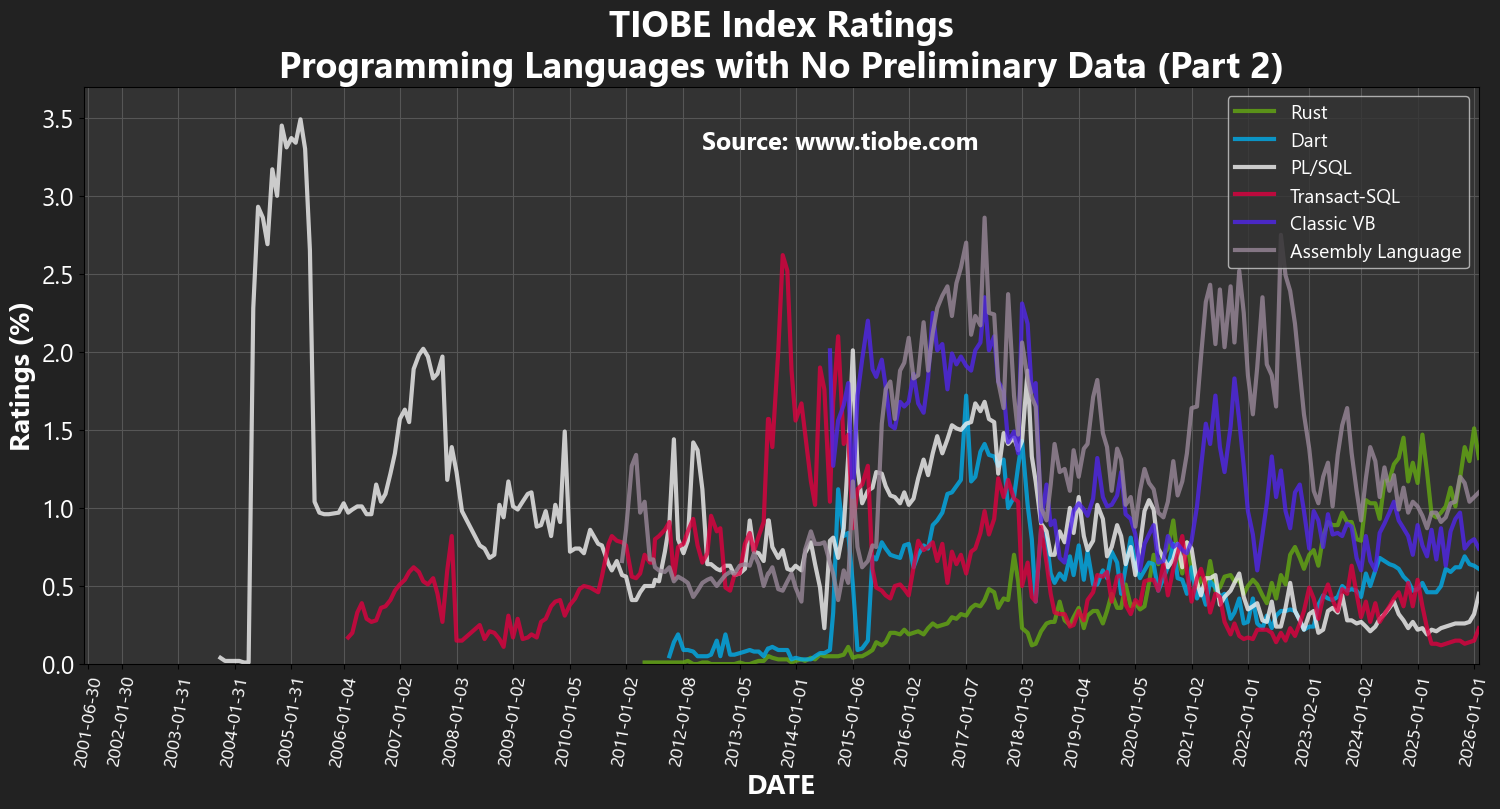

                      LOWEST RATING (DATE) | HIGHEST RATING (DATE)
                Rust |   0.0% (2012-03-11) |  1.51% (2026-01-01)
                Dart |  0.03% (2013-12-06) |  1.72% (2017-01-07)
              PL/SQL |  0.01% (2004-03-31) |  3.49% (2005-03-31)
        Transact-SQL |  0.11% (2008-11-02) |  2.62% (2013-10-10)
Classic Visual Basic |   0.6% (2020-02-04) |  2.35% (2017-05-06)
   Assembly Language |   0.4% (2014-02-08) |  2.86% (2017-05-06)


In [12]:
plt.figure(figsize=(18,7.5))
plt.axis([pd.Timestamp('2001-06-01'), pd.Timestamp('2026-02-01'), 0.0, 3.7])
plt.plot(tiobe.index, tiobe['Rust'], label='Rust', color='#64aa13', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Dart'], label='Dart', color='#02adeb', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['PL/SQL'], label='PL/SQL', color='#f2f2f2', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Transact-SQL'], label='Transact-SQL', color='#df0040', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Classic Visual Basic'], label='Classic VB', color='#5026eb', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Assembly Language'], label='Assembly Language', color='#998899', linewidth=3, alpha=0.8)
plt.text(pd.Timestamp('2012-05-06'), 3.3, 'Source: www.tiobe.com', fontsize=18, color='white', fontweight='bold')
plt.title('TIOBE Index Ratings\nProgramming Languages with No Preliminary Data (Part 2)', fontsize=26, color='white', fontweight='bold')
plt.xlabel('DATE', fontsize=20, color='white', fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, color='white', fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=13, color='white')
plt.yticks(fontsize=18, color='white')
plt.grid(color='#565656')
plt.legend(fontsize=14, loc='upper right', labelcolor='white')
plt.show()

print("                      LOWEST RATING (DATE) | HIGHEST RATING (DATE)")
for lang in ['Rust', 'Dart', 'PL/SQL', 'Transact-SQL', 'Classic Visual Basic', 'Assembly Language']:
    lang_rt = tiobe[~tiobe[lang].isnull()][lang]
    lang_min = lang_rt[lang_rt == min(lang_rt)]
    lang_max = lang_rt[lang_rt == max(lang_rt)]
    print("{:>20} | {:5}% ({}) | {:5}% ({})" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

**Here is the chart for six another programming languages. We can imply that:**

- **PL/SQL**, first appeared in late 2003, had substantial popularity in its first two years, with the maximum of nearly **3.5%**. Later, its rating was decreased in the upcoming years, generally staying between **0.5%** and **1.5%**, later down under **0.5%** in within the last four years.
- **Transact-SQL** (started in 2006) has seen its highest value with **%2.6%** in 2013. The ratings in the last five years constantly change up and down, often staying **below 1%**, and lastly, maintaining its rating **below 0.5%**.
- **Classic Visual Basic** (started in 2014) has progressed very well by usually staying above **1.5%** till the 1st quarter of 2018. But in 2020, we saw the language staying somewhere around **0.75%**, then went higher than **1%**, then fluctuate around **0.8%** value.
- **Dart** (started in 2011) reached its peak popularity in late 2016 with **1.7%**. Like others, it has lost some ratings later, and did not achieve staying above **0.5%** until 2024, then consistently held its rating above **0.5%**. However, it is not guaranteed if it can protect this rating in the future.
- **Rust**, another language that made its debut in 2011, has risen up very slowly. Until year 2024, it _never achieved any ratings_ that passed above **1%**. But it turned in its favor afterwards by staying above **%1** in the last several months, making it to the top 20.
- Lastly, **Assembly Language** (measurement started at around late 2010) began with the ratings no lower than **0.4%** in its first years. The language showed itself much better by reaching approximately **2.9%** in 2017. Similar to others, it goes within the range of **1%** and **1.5%** in 2020, then had its ratings increased to progress between **1.5%** and **2.5%** in the next two years. Recently, it tries to hold the rating above **1%**.

**All right, here comes another line chart that contains more programming languages with no preliminary data, added in the dataset _sometime after year 2020_:**

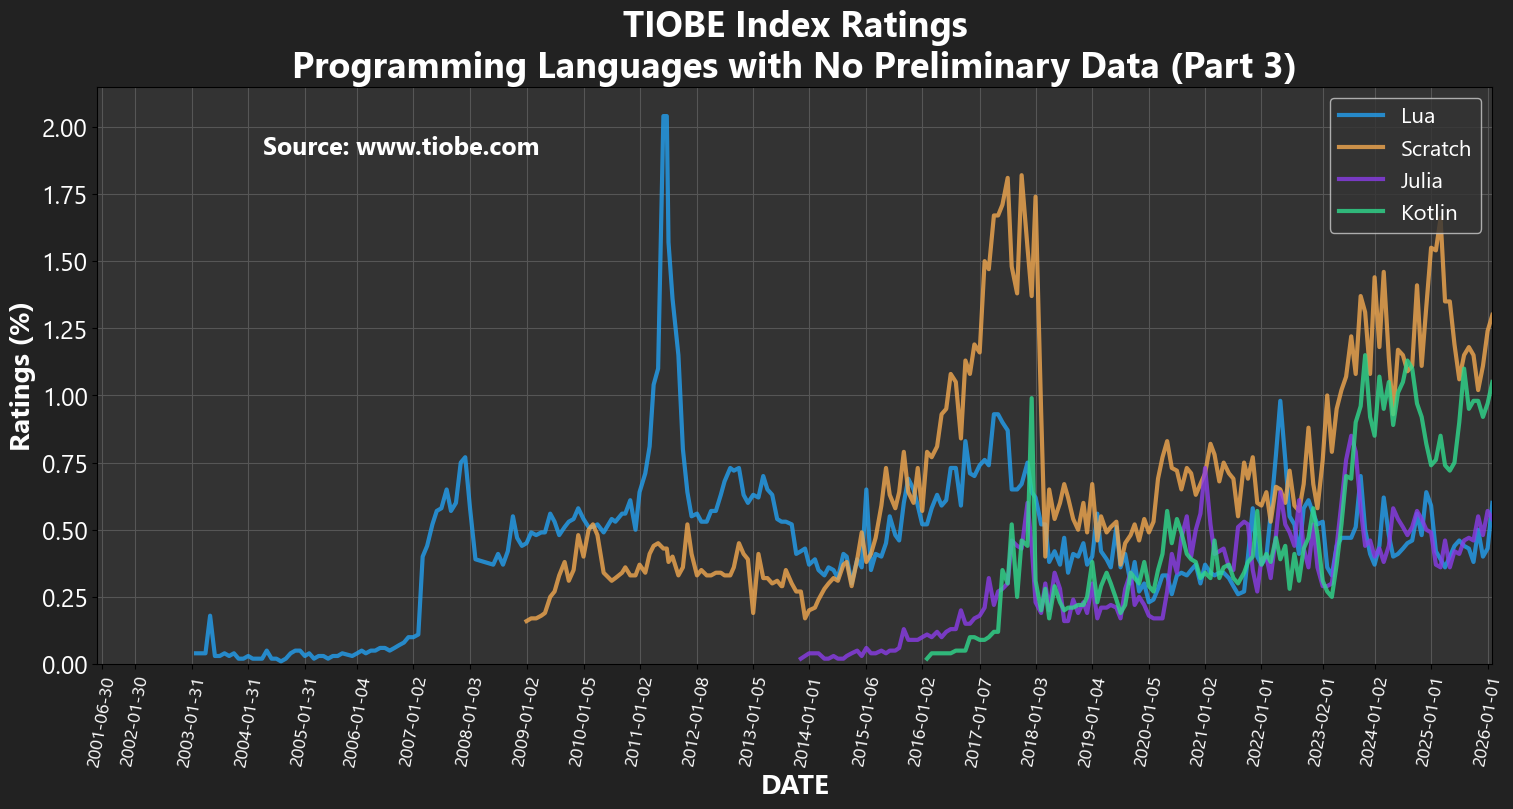

            LOWEST RATING (DATE) | HIGHEST RATING (DATE)
       Lua |  0.01% (2004-08-30) |  2.04% (2011-06-05)
   Scratch |  0.16% (2009-01-02) |  1.82% (2017-10-05)
     Julia |  0.02% (2013-11-09) |  0.85% (2023-08-04)
    Kotlin |  0.02% (2016-02-02) |  1.15% (2023-11-02)


In [13]:
plt.figure(figsize=(18,7.5))
plt.axis([pd.Timestamp('2001-06-01'), pd.Timestamp('2026-02-01'), 0.0, 2.15])
plt.plot(tiobe.index, tiobe['Lua'], label='Lua', color='#23a0f0', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Scratch'], label='Scratch', color='#f2a84f', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Julia'], label='Julia', color='#8a3ce8', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Kotlin'], label='Kotlin', color='#30d98d', linewidth=3, alpha=0.8)
plt.text(pd.Timestamp('2004-05-06'), 1.9, 'Source: www.tiobe.com', fontsize=18, color='white', fontweight='bold')
plt.title('TIOBE Index Ratings\nProgramming Languages with No Preliminary Data (Part 3)', fontsize=26, color='white', fontweight='bold')
plt.xlabel('DATE', fontsize=20, color='white', fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, color='white', fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=13, color='white')
plt.yticks(fontsize=18, color='white')
plt.grid(color='#565656')
plt.legend(fontsize=16, loc='upper right', labelcolor='white')
plt.show()

print("            LOWEST RATING (DATE) | HIGHEST RATING (DATE)")
for lang in ['Lua', 'Scratch', 'Julia', 'Kotlin']:
    lang_rt = tiobe[~tiobe[lang].isnull()][lang]
    lang_min = lang_rt[lang_rt == min(lang_rt)]
    lang_max = lang_rt[lang_rt == max(lang_rt)]
    print("{:>10} | {:5}% ({}) | {:5}% ({})" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

Let's analyze the outcome of this chart above, highlighting the rest of four languages with no preliminary data: 

* About **Lua** (which is a suitable one for some video games, if I'm not mistaken), it did not cause any awareness among software developers in its first four years; but afterwards, it finally gained some share in the ratings by reaching **0.75%** in late 2007, then its all-time peak value getting higher than **2%** in 2011! Later, the figure indicates that the language is unable to reach the **1%** boundary again up until today, at least a local peak was encountered, reaching approximately **1%** within year 2022.
* **Scratch** first appeared in 2009 and its first six years stayed between **0.2%** and **0.5**. However, a substantial increase of ratings happened continuously, up to **1.8%** in 2017, becoming its peak value, then went down to around **0.7%** till 2023. The last few years of this language fluctuated between the ratings of **1%** and **1.6%**.
* For **Julia**, which is an alternative programming language for data science, debuted in late 2013, gained its rating slowly in the first several years. Even this language appeared to become one of the top 20 languages around year 2023 with the rating of **%0.8** but it didn't last long! Nowadays, it keeps a rating around **0.5%**.
* Speaking of **Kotlin** which starts in 2016 and has some popularity among mobile development, especially seen usages for Android, claimed its first peak in late 2017 with exactly **1%**. Through ups and downs in the next years, the language got higher peak in 2023 with rating around **1.15%** and usually maintained its popularity around **1%** in the last months.

### One more chart to analyze...

This one contains three more programming languages which have **intermediate missing values** in common! When inspected, **SQL** had a very big gap between **2004** and **2017**!

Furthermore, **MATLAB** and **Objective-C** only had a few ones in **2002**.

To fill the missing ones properly, **linear interpolation** was applied to each of them...

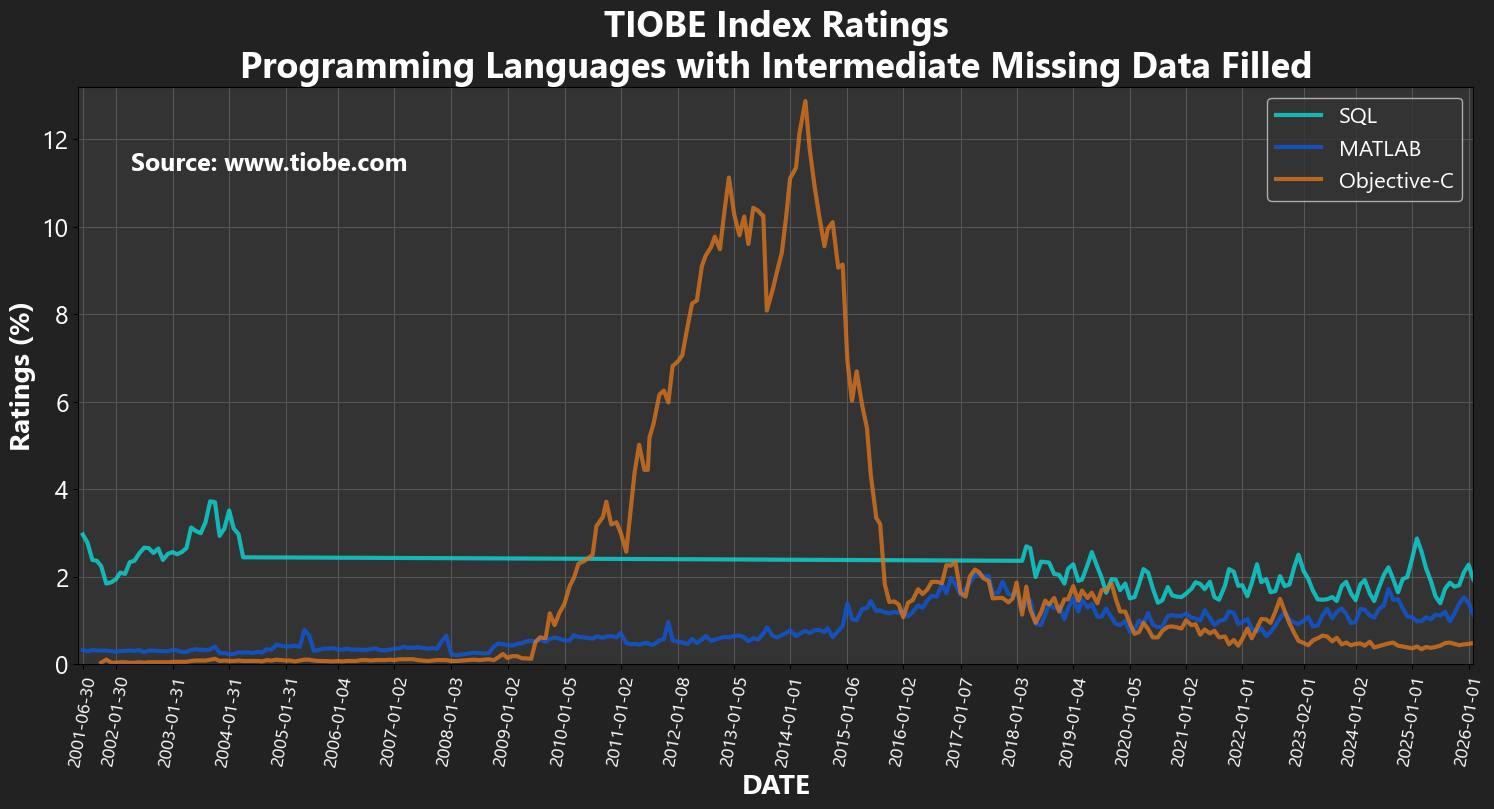

              LOWEST RATING (DATE) | HIGHEST RATING (DATE)
         SQL |  1.39% (2025-07-02) |  3.72% (2003-09-30)
      MATLAB |   0.2% (2008-02-07) |  2.06% (2017-05-06)
 Objective-C |  0.03% (2001-10-26) | 12.87% (2014-04-10)


In [14]:
tiobe['SQL'] = tiobe['SQL'].interpolate()
tiobe['MATLAB'] = tiobe['MATLAB'].interpolate()
tiobe['Objective-C'] = tiobe['Objective-C'].interpolate()
plt.figure(figsize=(18,7.5))
plt.axis([pd.Timestamp('2001-06-01'), pd.Timestamp('2026-02-01'), 0.0, 13.2])
plt.plot(tiobe.index, tiobe['SQL'], label='SQL', color='#0bd9d9', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['MATLAB'], label='MATLAB', color='#0d58d9', linewidth=3, alpha=0.8)
plt.plot(tiobe.index, tiobe['Objective-C'], label='Objective-C', color='#d9751e', linewidth=3, alpha=0.8)
plt.text(pd.Timestamp('2002-05-06'), 11.3, 'Source: www.tiobe.com', fontsize=18, color='white', fontweight='bold')
plt.title('TIOBE Index Ratings\nProgramming Languages with Intermediate Missing Data Filled', fontsize=26, color='white', fontweight='bold')
plt.xlabel('DATE', fontsize=20, color='white', fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, color='white', fontweight='bold')
plt.xticks(tiobe_years_ind, rotation=80, fontsize=13, color='white')
plt.yticks(fontsize=18, color='white')
plt.grid(color='#565656')
plt.legend(fontsize=16, labelcolor='white')
plt.show()

print("              LOWEST RATING (DATE) | HIGHEST RATING (DATE)")
for lang in ['SQL', 'MATLAB', 'Objective-C']:
    lang_rt = tiobe[~tiobe[lang].isnull()][lang]
    lang_min = lang_rt[lang_rt == min(lang_rt)]
    lang_max = lang_rt[lang_rt == max(lang_rt)]
    print("{:>12} | {:5}% ({}) | {:5}% ({})" \
          .format(lang, lang_min[0], str(lang_min.index[0])[:10], lang_max[0], str(lang_max.index[0])[:10]))

**From this figure above, we have these implications:**
    
**Objective-C** remained at the bottom until the first half of 2009! Then it built up its rating significantly every year until 2015. We've seen the rating going **above 12%**, which looks incredible for a programming language! One of the reasons should be because third party applications were written with this language for **iOS**, Apple's mobile operating system for _iPhone_ and _iPad_. And, lots of programmers got heavily interested in making mobile apps and games with ever-growing popularity of this operating system with Apple's compatible hardware. However, things turned reversibly for the language after the peak in 2014, as it can be seen in the chart that it quickly lost the popularity in **just two years**, down to **less than 2%** and never caught up the previous days' ratings, even it went below **1%** in the recent years. Here, one reason might be that **Swift**, which is another programming language created by Apple, is replacing the language slowly for mobile application development and if you carefully inspect the ratings in the chart of _"Programming Languages with No Preliminary Data (Part 1)"_, Swift's rating should always be ahead of this language.

There is not much to say about **MATLAB**, as the language stayed below **1%** for a very long time, up until 2015. Although it became as high as **2%** in 2017, we see the values going up and down around **1%** again, and this never changed even entering 2026.

The database language **SQL** had the highest rating **nearly 3.8%** in 2003. To be honest, it is impossible to discuss if it went higher than that value or not in the very long time gap until the beginning of 2018. Perhaps, TIOBE did not take the language into account, but later re-included for measurements. The general trend in the last eight consecutive years showed a small decrease overall, usually going **under 2%** but it may find the potential to rise the rating.

**Note:** In the official statement of June 2025 top 20 index list, **the CEO Paul Jensen** mentioned why SQL had such a big gap and removed from measurements that lasted for over a decade:

_"In the beginning of 2004, somebody noted that SQL was not a programming language. After lots of debates, it was decided to take SQL from the list. It was in 2018 that somebody else pointed out to use that SQL is Turing complete, albeit in a tricky way. And if you are Turing complete, you are considered to be a programming language. Hence, as of that moment SQL was readded to the TIOBE Index and since database and SQL go hand in hand, SQL became a top 10 player again."_

## Counting the Ranks for Each Programming Language

So, the data visualizations above clearly demonstrated _the states of all programming languages_, both in the past and the present.

As a different and unique aspect, in the next one, I'd like to observe **how each language ranked against each other** by counting their placements within all evaluations made by TIOBE each month.

For this to work, we need to get the ranks of all languages for each specific date (i.e. for each row in the dataset). Plus, my assumptions are the ranking is in **dense** method; values are compared from highest to lowest as intended; and any NULL values are not included.

In [15]:
tiobe_ranks = tiobe.rank(method='dense', ascending=False, axis=1)

Then, it is easy to count the rank values for individual languages.

Here, a function needs to be defined to get the work done, thus the count operation is carried out seamlessly. Meanwhile, I limited this to take only **the top 20 rankings**.

In [16]:
def get_rank_count(x):
    ranks = []
    for i in range(1,21):
        ranks.append(list(x.values).count(i))
    return ranks
tiobe_ranks_count = tiobe_ranks.apply(get_rank_count)

After we obtained the counts for top 10 rankings for all available languages, it is time to prepare the actual table. 

Here, I wanted the ranks to be the columns, labeling them from **1st** to **10th**, while the languages are indexes themselves. Furthermore, it should be convenient to highlight the corresponding cells which mark **the highest count** for each specific rank to determine the dominance of languages in this way.

_Note: Those highlighted cells might not appear if viewed from GitHub._

In [17]:
ranking_labels = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', '11th', '12th', '13th', '14th', '15th', '16th', '17th', '18th', '19th', '20th']
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #207bff' if v else '' for v in is_max]
tiobe_ranks_count_df = tiobe_ranks_count.T
tiobe_ranks_count_list = dict(zip(tiobe_ranks_count.index, ranking_labels))
tiobe_ranks_count_df.rename(columns=tiobe_ranks_count_list, inplace=True)
tiobe_ranks_count_df.style.apply(highlight_max)

,1st,2nd,3rd,4th,5th,6th,7th,8th,9th,10th,11th,12th,13th,14th,15th,16th,17th,18th,19th,20th
C,66,211,9,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Java,174,62,29,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Python,53,5,28,22,33,40,63,12,10,8,12,7,0,0,0,0,0,0,0,0
C++,0,16,179,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C#,0,0,3,32,145,45,33,12,3,7,3,1,2,7,0,0,0,0,0,0
Visual Basic,0,0,0,0,14,59,24,18,10,12,9,9,9,3,1,3,1,2,5,1
JavaScript,0,0,0,0,0,49,83,55,42,30,31,3,0,0,0,0,0,0,0,0
PHP,0,0,12,60,50,48,27,34,23,11,2,4,8,4,7,3,0,0,0,0
R,0,0,0,0,0,0,0,5,6,6,6,12,15,10,11,23,14,17,15,30
SQL,0,0,0,0,2,26,21,79,81,62,15,6,1,0,0,0,0,0,0,0


### Ah, we finally retrieved the table we wanted!

**This explains a lot about the superiority of programing languages compared to others, but let's make explanations that substantially draw our attention:**

- **Java** is _the most successful_ programming language according to TIOBE Index ratings! Within all rating measurements since the beginning, it took _the 1st place_ **174** times! That's an incredible number for a language in software development! We wonder whether or not it can increase the number for the years to come, because its ratings got behind other long-living programming languages.
- **C** is the _2nd best_ programming language, as it _placed 2nd_ **211** times and became the 1st language in **66** different dates of measurements! In addition, the language will seem to continue staying strong in the future, because as you see in the ranking counts, it never went out of _top 4 places_!
- **Python** have higher ranking distributions than other top programming languages in terms of its counts above. Anyway, this language is the another one which achieved to reach the top rating among all with a total of **53** times! And, as you notice from the very first chart above, the 1st placements have started from late 2021, and never gave its leadership to any other language! Thus, there is one question in mind, can it contniue becoming a threat for **Java** and **C** in the future?
- **C++** also looked strong as it had the most _3rd_ and _4th_ place counts, which are **179** and **98**, respectively. More interestingly, it never went _higher than 2rd place_ and _lower than 4th place!_ Looks strange that we never saw this language as a leader, isn't it?
- We could realize similar distributions for **C#** and **PHP**, when compared to **Python**; but, both two did not reach 1st and 2nd places in all measurements of different dates. Here, **C#** has been in the _5th place_ mostly, with **145** times. Moreover, **PHP** has seen the 4th places **60** times and claimed _3rd places_ much higher amount than C#.
- Speaking of **Visaul Basic**, the highest ranking it ever achieved was _5th place_ (**14** times), and among all languages, it holds the most _6th place_ counts, which is **59**.
- The database language **SQL** seemed to score the most _8th, 9th and 10th places,_ which is **79**, **81** and **62** times, respectively. Its best rank was _5th place which only happened twice in TIOBE Index history._
- **JavaScript** never placed in the top 5 through the rankings, but became the most _7th placed_ language with a total of **83** times and earned its _6th places_ by **49** times!
- **Perl** and **Objective-C** both achieved to climb up to _3rd place (**3** and **30** times)._ However, considering the previous visualzations of the ratings above, they are now far away from the popularities back in the old days.
- **Delphi/Object Pascal** occupied the ranks of _11th and 12th_ mostly, with total of **43** and **39** times in different rating measurements.
- The latest addition **Ada** was disclosed to be the programming language of _13th and 14th_ most popular actually. Also, their counts are interestingly equal, which is **34**.
- **MATLAB** favors the places of _15th, 16th and 17th_ respectively, as those have been earned more than **150** times in total.
- Among all available programming languages here, perhaps the least successful one is **Julia**, which was seen _twice_ in the 20th place and never got higher!

## Predicting the Ratings for the Next Three Years

So far, we've constructed the charts containing the ratings for all available programming languages in the dataset and counted all the specific rankings for each of them. Now, let's move one step further: _The prediction of ratings within the next three years._

First of all, I decided to take **the last ten years** of ratings data which looks appropriate for the predictions. Hence, the dataset has been sliced to include the ratings that begin from _January 2016:_

In [18]:
tiobe_post2016 = tiobe.loc['2016':]

Next, because a _machine learning algorithm_ will be involved to predict something, some data preparations are needed beforehand. Below, I've gone over these **three** steps for this purpose:

- **Generate the dates for the next 3 years (i.e. the next 36 months):** To do it, the last evaluation date of TIOBE Index is fetched to extract the year and month, separately. Then, a list is created to hold the future months and years as _timestamps_ up until 36 different dates have been generated. By the way, _the first day of the month_ is considered for each.
- **Number of days from the last-10-year dates for ML training:** The dates from the last ten years have been converted to the number of days; each including the gap against the date _January 1st, 1900._ Luckily, the timestamp data type allowed to make subtractions from each other to obtain the timedelta.
- **Number of days from the next-3-year dates for ML prediction:** The future dates created previously will also have their number of days extracted, in the same manner.

In [19]:
last_eval = tiobe_post2016.index[-1]
iter_year, iter_month = last_eval.year, last_eval.month
next_36months = []
for i in range(36):
    if iter_month == 12:   iter_month = 1;  iter_year += 1
    else: iter_month += 1
    next_36months.append(pd.Timestamp(year=iter_year, month=iter_month, day=1))
days_train = []
for ts in tiobe_post2016.index:
    days_train.append((ts - pd.Timestamp('1900-01-01')).days)
days_test = []
for ts in next_36months:
    days_test.append((ts - pd.Timestamp('1900-01-01')).days)

Since we're dealing with **continuous values**, then **Linear Regression** model could be a good start, then trying with **Ridge** and **Lasso** (without parameter tuning) and **Polynomial** ones.

**Now is the time for prediction!**

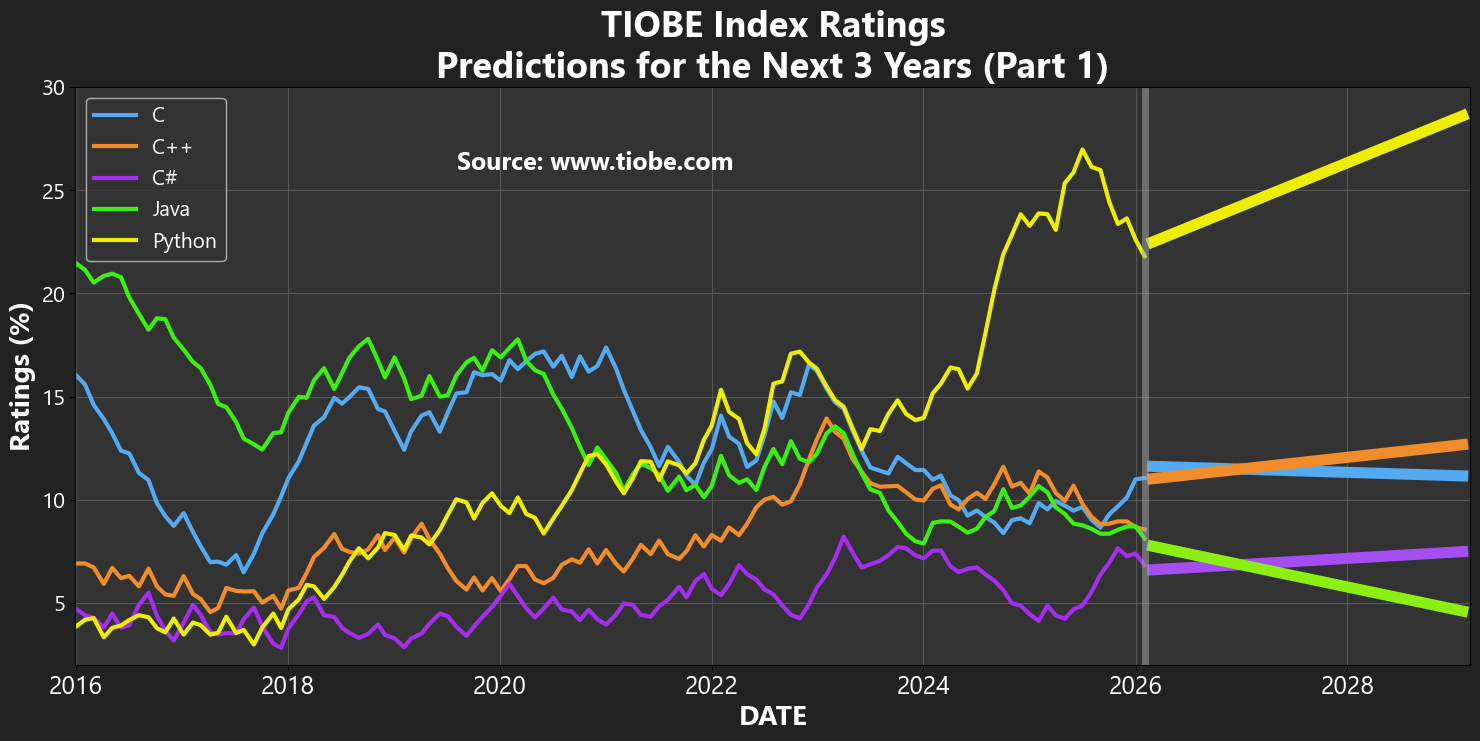

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
days_train = np.array(days_train).reshape(-1, 1)
days_test = np.array(days_test).reshape(-1, 1)
all_predictions_linreg = [];   all_predictions_ridge = [];   all_predictions_lasso = [];
all_predictions_poly_ridge = [];   all_predictions_poly_lasso = []
lang_colors = ['#54aaf0', '#f08c29', '#a44df0', '#8bf011', '#eeee00']
linreg = LinearRegression();   ridge = Ridge();   lasso = Lasso();   poly = PolynomialFeatures(2)
for lang in ['C', 'C++', 'C#', 'Java', 'Python']:
    linreg.fit(days_train, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_linreg.append(linreg.predict(days_test))
    ridge.fit(days_train, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_ridge.append(ridge.predict(days_test))
    lasso.fit(days_train, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_lasso.append(lasso.predict(days_test))
    days_train_poly = poly.fit_transform(days_train)
    days_test_poly = poly.fit_transform(days_test)
    ridge.fit(days_train_poly, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_poly_ridge.append(ridge.predict(days_test_poly))
    lasso.fit(days_train_poly, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_poly_lasso.append(lasso.predict(days_test_poly))
    
plt.figure(figsize=(18,7.5))
plt.axis([pd.Timestamp('2015-12-31'), pd.Timestamp('2029-02-28'), 2.0, 30.0])
plt.plot(tiobe_post2016['C'], label='C', color='#54aaf0', linewidth=3)
plt.plot(tiobe_post2016['C++'], label='C++', color='#f08c29', linewidth=3)
plt.plot(tiobe_post2016['C#'], label='C#', color='#a42df0', linewidth=3)
plt.plot(tiobe_post2016['Java'], label='Java', color='#3bf011', linewidth=3)
plt.plot(tiobe_post2016['Python'], label='Python', color='#eeee00', linewidth=3)
plt.text(pd.Timestamp('2019-08-06'), 26.0, 'Source: www.tiobe.com', fontsize=18, color='white', fontweight='bold')
for i in range(5):
    plt.plot(next_36months, all_predictions_linreg[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_ridge[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_lasso[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_poly_ridge[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_poly_lasso[i], color=lang_colors[i], linewidth=8)
plt.title('TIOBE Index Ratings\nPredictions for the Next 3 Years (Part 1)', fontsize=26, color='white', fontweight='bold')
plt.xlabel('DATE', fontsize=20, color='white', fontweight='bold')
plt.ylabel('Ratings (%)', fontsize=20, color='white', fontweight='bold')
plt.xticks(fontsize=18, color='white')
plt.yticks(fontsize=16, color='white')
plt.axvline(tiobe_post2016.index[-1], color='#aaaaaa', linewidth=5, alpha=0.5)
plt.legend(fontsize=15, labelcolor='white')
plt.grid(color='#565656')
plt.show()

_**Here, we revealed the popularity of these programming languages for the future!**_ 

From the chart above, we can imply that the ratings of **C** will _almost stay the same_ in the next 3 years, despite being an old language! And still, it will probably stay strong against all other languages, but one! Well, the prediction tells that **Python** will continue to gain popularity (despite the fall of ratings in the last several months), and, even increase the gap against other languages! Don't be surprised if its rating gets approximately **30%** beyond 2026!

Other C-family languages, **C++** and **C#** will have slight increases in the upcoming years and will probably stay in the top 5!

On the contrary, **Java** will continue to lose ratings; the predictions indicate that it will go down below **5%** by the year 2029. This feels so bad and heartbreaking for the lovers of this language, right?

_**Note:** Usage of Ridge and Lasso did not make noticeable changes at all; and similarly, the higher order of Polynomial features also did not cause such big curve shapes. That's why I decided to stay with the Linear Regression for prediction._

**All right, let's go on predicting the ratings of different programming languages. I've chosen a 2nd group of five others:** **JavaScript**, **PHP**, **SQL**, **Fortran**, **Ada**

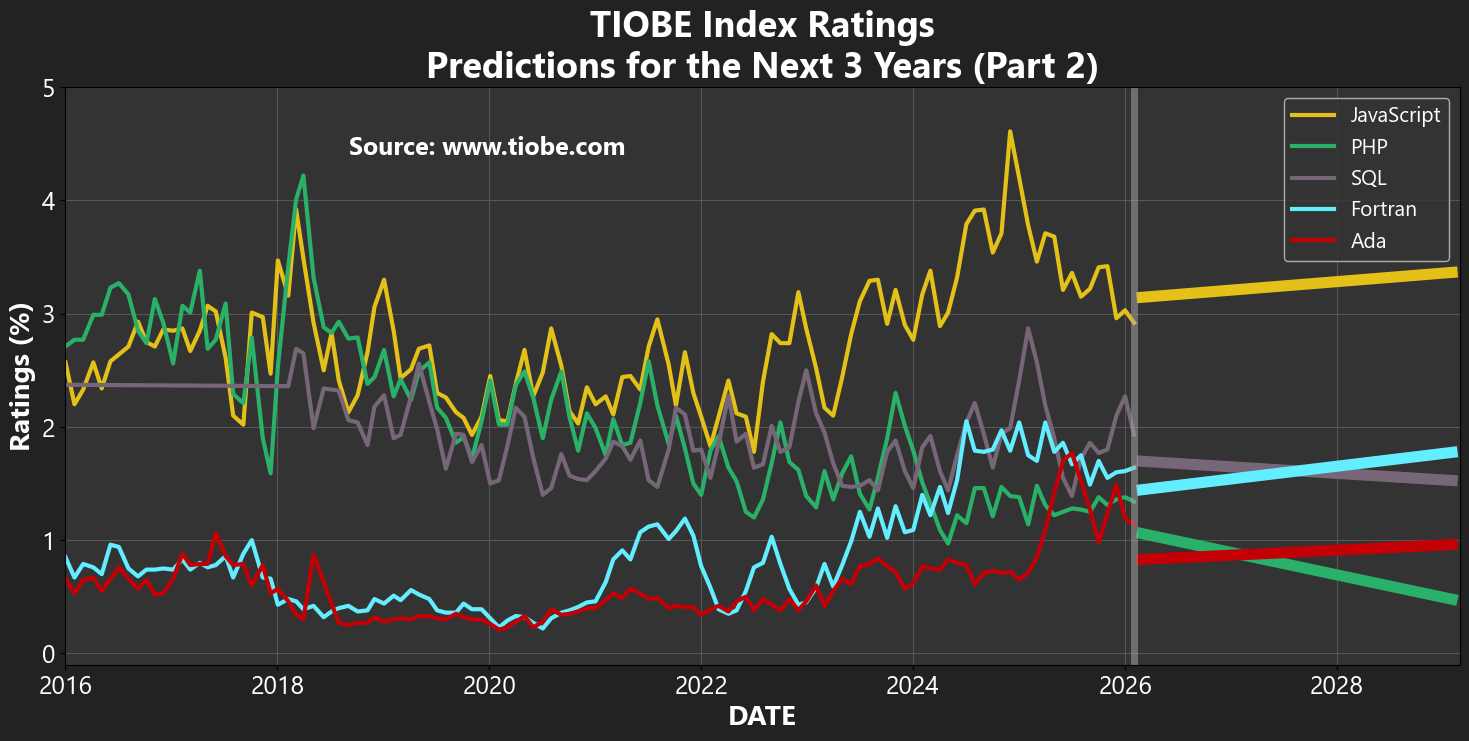

In [21]:
all_predictions_linreg = [];   all_predictions_ridge = [];   all_predictions_lasso = [];
all_predictions_poly_ridge = [];   all_predictions_poly_lasso = []
lang_colors = ['#e3c119', '#29b069', '#776677', '#63eeff', '#c20006']
for lang in ['JavaScript', 'PHP', 'SQL', 'Fortran', 'Ada']:
    linreg.fit(days_train, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_linreg.append(linreg.predict(days_test))
    ridge.fit(days_train, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_ridge.append(ridge.predict(days_test))
    lasso.fit(days_train, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_lasso.append(lasso.predict(days_test))
    days_train_poly = poly.fit_transform(days_train)
    days_test_poly = poly.fit_transform(days_test)
    ridge.fit(days_train_poly, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_poly_ridge.append(ridge.predict(days_test_poly))
    lasso.fit(days_train_poly, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_poly_lasso.append(lasso.predict(days_test_poly))
    
plt.figure(figsize=(18,7.5))
plt.axis([pd.Timestamp('2015-12-31'), pd.Timestamp('2029-02-28'), -0.1, 5.0])
plt.plot(tiobe_post2016['JavaScript'], label='JavaScript', color='#e3c119', linewidth=3)
plt.plot(tiobe_post2016['PHP'], label='PHP', color='#29b069', linewidth=3)
plt.plot(tiobe_post2016['SQL'], label='SQL', color='#776677', linewidth=3)
plt.plot(tiobe_post2016['Fortran'], label='Fortran', color='#63eeff', linewidth=3)
plt.plot(tiobe_post2016['Ada'], label='Ada', color='#c20006', linewidth=3)
plt.text(pd.Timestamp('2018-09-06'), 4.4, 'Source: www.tiobe.com', fontsize=18, color='white', fontweight='bold')
for i in range(5):
    plt.plot(next_36months, all_predictions_linreg[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_ridge[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_lasso[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_poly_ridge[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_poly_lasso[i], color=lang_colors[i], linewidth=8)
plt.title('TIOBE Index Ratings\nPredictions for the Next 3 Years (Part 2)', fontsize=26, color='white', fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold', color='white')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold', color='white')
plt.xticks(fontsize=18, color='white')
plt.yticks(fontsize=18, color='white')
plt.axvline(tiobe_post2016.index[-1], color='#aaaaaa', linewidth=5, alpha=0.5)
plt.legend(fontsize=15, labelcolor='white')
plt.grid(color='#565656')
plt.show()

From this chart above, consequently, all these programming languages' rating will not change much! Among all of them, **PHP** will be affected as the worst due to losing the rating more than the others in the future and it is expected to go under **1%** later in 2026. Meanwhile, the negative effect will be lesser for **SQL**. Together with these, **JavaScript**, **Fortran** and **Ada** will have very slight increases for the days ahead.

**OK then, let's choose another five programming languages and predict their future ratings: Perl, Assembly Language, Rust, Delphi/Object Pascal, Scratch**

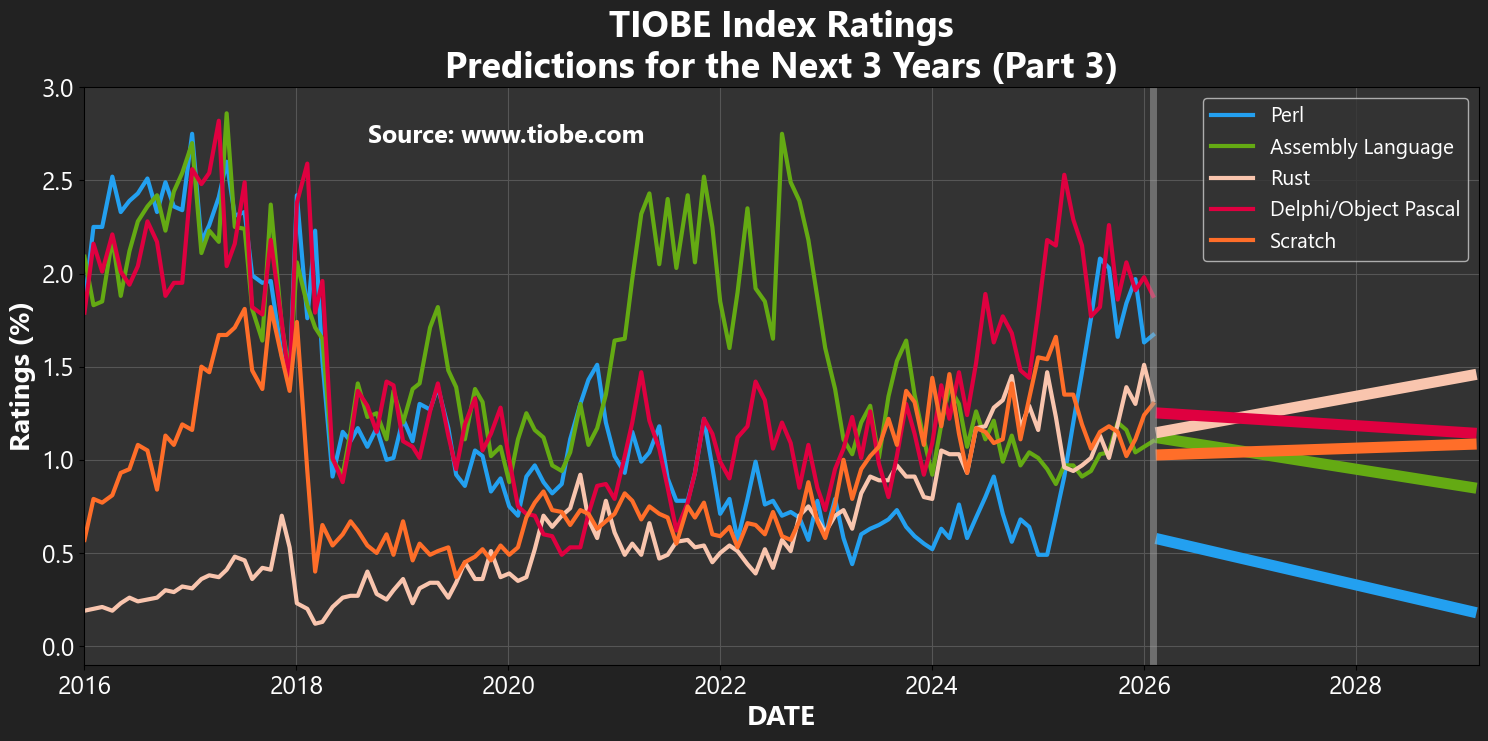

In [22]:
all_predictions_linreg = [];   all_predictions_ridge = [];   all_predictions_lasso = [];
all_predictions_poly_ridge = [];   all_predictions_poly_lasso = []
lang_colors = ['#23a0f0', '#64aa13', '#f9c5ae', '#df0040', '#ff6e29']
for lang in ['Perl', 'Assembly Language', 'Rust', 'Delphi/Object Pascal', 'Scratch']:
    linreg.fit(days_train, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_linreg.append(linreg.predict(days_test))
    ridge.fit(days_train, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_ridge.append(ridge.predict(days_test))
    lasso.fit(days_train, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_lasso.append(lasso.predict(days_test))
    days_train_poly = poly.fit_transform(days_train)
    days_test_poly = poly.fit_transform(days_test)
    ridge.fit(days_train_poly, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_poly_ridge.append(ridge.predict(days_test_poly))
    lasso.fit(days_train_poly, tiobe_post2016[lang].values.reshape(-1, 1))
    all_predictions_poly_lasso.append(lasso.predict(days_test_poly))

plt.figure(figsize=(18,7.5))
plt.axis([pd.Timestamp('2015-12-31'), pd.Timestamp('2029-02-28'), -0.1, 3.0])
plt.plot(tiobe_post2016['Perl'], label='Perl', color=lang_colors[0], linewidth=3)
plt.plot(tiobe_post2016['Assembly Language'], label='Assembly Language', color=lang_colors[1], linewidth=3)
plt.plot(tiobe_post2016['Rust'], label='Rust', color=lang_colors[2], linewidth=3)
plt.plot(tiobe_post2016['Delphi/Object Pascal'], label='Delphi/Object Pascal', color=lang_colors[3], linewidth=3)
plt.plot(tiobe_post2016['Scratch'], label='Scratch', color=lang_colors[4], linewidth=3)
plt.text(pd.Timestamp('2018-09-06'), 2.7, 'Source: www.tiobe.com', fontsize=18, color='white', fontweight='bold')
for i in range(5):
    plt.plot(next_36months, all_predictions_linreg[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_ridge[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_lasso[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_poly_ridge[i], color=lang_colors[i], linewidth=8)
    # plt.plot(next_36months, all_predictions_poly_lasso[i], color=lang_colors[i], linewidth=8)
plt.title('TIOBE Index Ratings\nPredictions for the Next 3 Years (Part 3)', fontsize=26, color='white', fontweight='bold')
plt.xlabel('DATE', fontsize=20, fontweight='bold', color='white')
plt.ylabel('Ratings (%)', fontsize=20, fontweight='bold', color='white')
plt.xticks(fontsize=18, color='white')
plt.yticks(fontsize=18, color='white')
plt.axvline(tiobe_post2016.index[-1], color='#aaaaaa', linewidth=5, alpha=0.5)
plt.legend(fontsize=15, labelcolor='white')
plt.grid(color='#565656')
plt.show()

From these 3rd group of programming languages, we can imply that **Perl** and **Assembly Language** will see their ratings gradually drop in the upcoming years. Of course, **Perl**'s rating cannot go below 0 if we consider beyond the future of these three years, but it seems that these higher ratings obtained in the last months might be temporary and it might go down again sooner or later. That's the inference we can make for this language according to the chart.

Speaking of others, **Delphi/Object Pascal** may not have its rating affected so badly as it has high potential to stay above **1%** rating. **Scratch**, by the way, may roughly stay the same at around **1%** in the next three years. And, **Rust** will likely get rating increase as it can become one of the top 10 programming languages, depending on the adoption and usages by the software engineers worldwide.

**These charts above might be revised in the next updates due to these reasons:**

- Addition of _confidence intervals_ could be convenient to display the possible range of rating values can be taken for each programming language involved.
- It is certain that Linear Regression is too simple for prediction and my predictions with other models such as Ridge, Lasso and their Polynomial variants aren't so great! Thus, more complex _machine learning regression_ algorithms will be applied for the attempt to make more accurate predictions.

### **Well, that's it for the analyses of TIOBE Index Ratings of these programming languages.**

# **See you in the next issue and thank you very much for reading!**